In [1]:
import pandas as pd
import seaborn as sns
import seaborn as sns
import numpy as np

/tmp/ipykernel_4074307/3452826458.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [44]:
para = pd.read_csv('../key_files/generation_1_parallelism.txt',sep = '\t')

In [45]:
para = para[para['source'] == 'snp']

In [46]:
para

,site,mean,lower,upper,generation,source
0,1,0.399356,0.369797,0.428495,1,snp
1,2,0.073612,0.014468,0.128584,1,snp
2,4,0.695603,0.680184,0.711607,1,snp
3,5,0.691080,0.633978,0.756238,1,snp
4,6,0.480042,0.425756,0.538647,1,snp
5,9,0.279275,0.248683,0.308896,1,snp
6,10,0.233950,0.174433,0.287781,1,snp
7,11,0.088494,0.058181,0.117339,1,snp
8,12,0.100474,0.071537,0.126819,1,snp
9,13,0.043040,0.018482,0.063527,1,snp


In [47]:
pred_ss_p1 = pd.read_csv('../key_files/Genomic_offset_stabilizing_selection_loo_era5_prediction_summary_p1.txt',sep = '\t')

In [48]:
pred_ss_log = pd.read_csv('../key_files/Genomic_offset_stabilizing_selection_loo_era5_prediction_summary.txt',sep = '\t')


In [49]:
pred_ss_p1 = pred_ss_p1.groupby('site')['r2'].mean()

pred_ss_p1 = pred_ss_p1.reset_index()

pred_ss_p1['transformation'] = 'no_log'

In [50]:
pred_ss_log = pred_ss_log.groupby('site')['r2'].mean()

pred_ss_log = pred_ss_log.reset_index()

pred_ss_log['transformation'] = 'log'

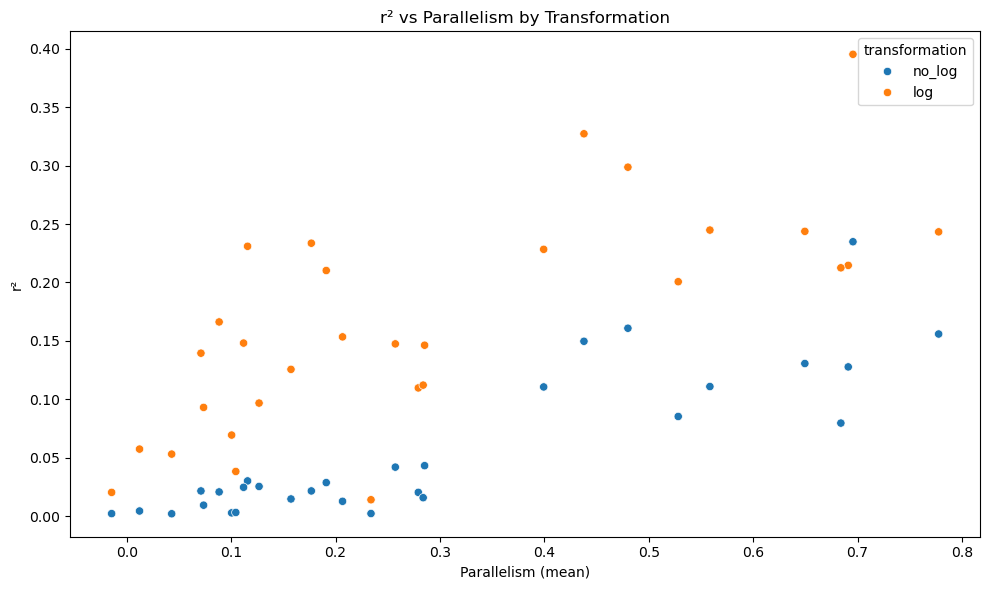

In [51]:
# Step 1: Combine both r² datasets
combined_r2 = pd.concat([pred_ss_p1, pred_ss_log], ignore_index=True)

# Step 2: Merge with 'para' DataFrame to bring in parallelism info
combined_with_para = combined_r2.merge(para[['site', 'mean']], on='site', how='left')

# Step 3: Optional - Rename columns for clarity
combined_with_para.rename(columns={'mean': 'parallelism'}, inplace=True)

# Step 4: Plot r² vs parallelism, color by transformation
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_with_para, x='parallelism', y='r2', hue='transformation')
plt.title('r² vs Parallelism by Transformation')
plt.xlabel('Parallelism (mean)')
plt.ylabel('r²')
plt.tight_layout()
plt.show()


In [52]:
import statsmodels.formula.api as smf

# Run linear regression for each transformation group and store the summaries
results = {}
for transformation in combined_with_para['transformation'].unique():
    subset = combined_with_para[combined_with_para['transformation'] == transformation]
    model = smf.ols('r2 ~ parallelism', data=subset).fit()
    results[transformation] = {
        'slope': model.params['parallelism'],
        'intercept': model.params['Intercept'],
        'r_squared': model.rsquared,
        'p_value': model.pvalues['parallelism']
    }


# Re-import necessary libraries after code execution state reset
import pandas as pd
import statsmodels.formula.api as smf

# Reconstruct the combined_with_para DataFrame assuming previous logic
# Simulated content from earlier steps (you can replace this with the real file paths or variables if needed)


# Prepare the pred_ss_p1 and pred_ss_log data
pred_ss_p1 = pred_ss_p1.groupby('site')['r2'].mean().reset_index()
pred_ss_p1['transformation'] = 'no_log'

pred_ss_log = pred_ss_log.groupby('site')['r2'].mean().reset_index()
pred_ss_log['transformation'] = 'log'

# Combine both transformations
combined_r2 = pd.concat([pred_ss_p1, pred_ss_log], ignore_index=True)

# Merge with parallelism info
combined_with_para = combined_r2.merge(para[['site', 'mean']], on='site', how='left')
combined_with_para.rename(columns={'mean': 'parallelism'}, inplace=True)

# Run linear regression for each transformation group
results = {}
for transformation in combined_with_para['transformation'].unique():
    subset = combined_with_para[combined_with_para['transformation'] == transformation]
    model = smf.ols('r2 ~ parallelism', data=subset).fit()
    results[transformation] = {
        'slope': model.params['parallelism'],
        'intercept': model.params['Intercept'],
        'r_squared': model.rsquared,
        'p_value': model.pvalues['parallelism']
    }

# Display the stats
results_df = pd.DataFrame(results).T

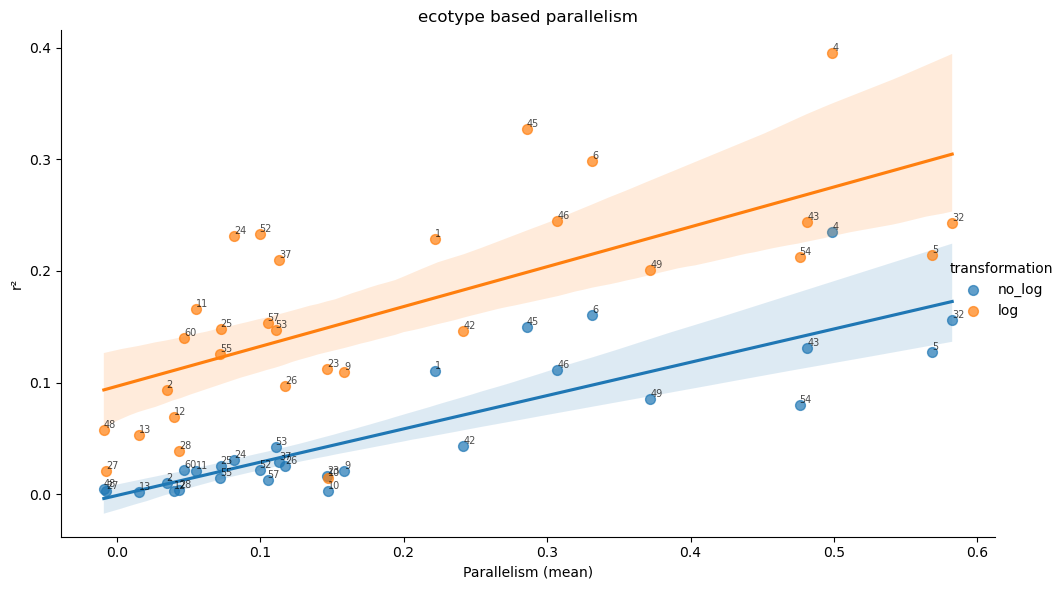

           slope  intercept  r_squared       p_value
no_log  0.298676  -0.001312   0.737770  1.250474e-09
log     0.357423   0.096615   0.478515  2.297705e-05


In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the lmplot
g = sns.lmplot(
    data=combined_with_para,
    x='parallelism',
    y='r2',
    hue='transformation',
    height=6,
    aspect=1.5,
    scatter_kws={'s': 50, 'alpha': 0.7}
)

# Access the Axes object
ax = g.ax

# Annotate each point with site label
for _, row in combined_with_para.iterrows():
    ax.text(
        row['parallelism'], row['r2'], str(row['site']),
        fontsize=7, alpha=0.7, ha='left', va='bottom'
    )

# Tweak legend and labels
g._legend.set_bbox_to_anchor((1.05, 0.5))  # Move legend to the side
g._legend.set_frame_on(False)

plt.title('ecotype based parallelism')
plt.xlabel('Parallelism (mean)')
plt.ylabel('r²')
plt.tight_layout()
plt.show()

print(results_df)

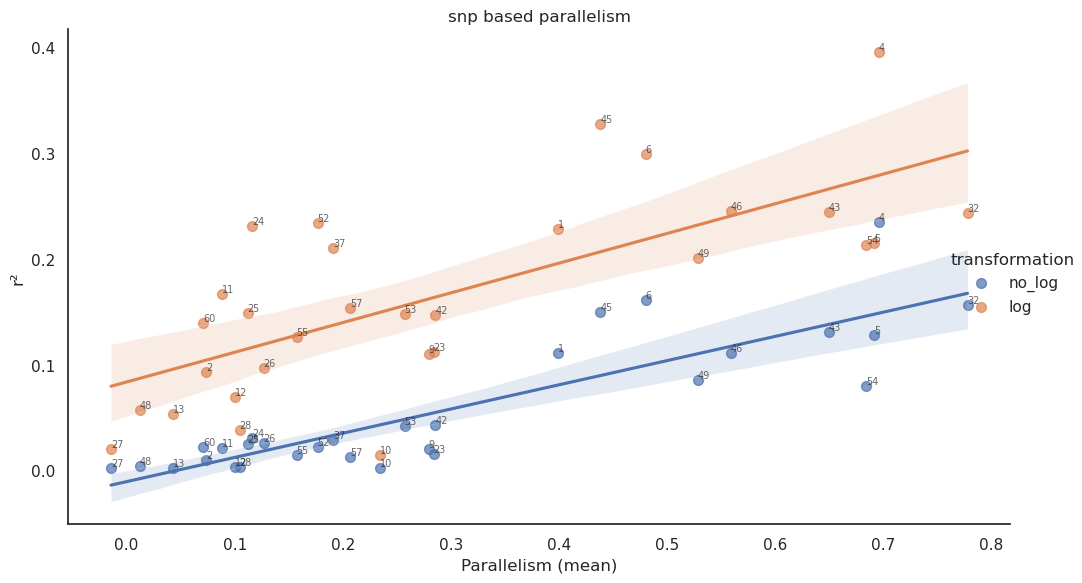

           slope  intercept  r_squared       p_value
no_log  0.228568  -0.010559   0.752743  5.440149e-10
log     0.280468   0.083511   0.513328  8.467658e-06


In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the lmplot
g = sns.lmplot(
    data=combined_with_para,
    x='parallelism',
    y='r2',
    hue='transformation',
    height=6,
    aspect=1.5,
    scatter_kws={'s': 50, 'alpha': 0.7}
)

# Access the Axes object
ax = g.ax

# Annotate each point with site label
for _, row in combined_with_para.iterrows():
    ax.text(
        row['parallelism'], row['r2'], str(row['site']),
        fontsize=7, alpha=0.7, ha='left', va='bottom'
    )

# Tweak legend and labels
g._legend.set_bbox_to_anchor((1.05, 0.5))  # Move legend to the side
g._legend.set_frame_on(False)

plt.title('snp based parallelism')
plt.xlabel('Parallelism (mean)')
plt.ylabel('r²')
plt.tight_layout()
plt.show()
print(results_df)

In [15]:
results_df

,slope,intercept,r_squared,p_value
no_log,0.240075,-0.001949,0.691827,1.863017e-16
log,0.291462,0.094838,0.461829,2.369927e-09


In [54]:
#finalgen_samples = pd.read_csv('../final_gen.csv')['sample_name']
first_gen = pd.read_csv('../key_files/generation_1_sample_names.txt',header=None)[0]
samples = first_gen.to_list()

#clim_sites_during_exp = pd.read_csv('/carnegie/nobackup/scratch/tbellagio/grene/data/bio')
clim_sites_during_exp = pd.read_csv('../key_files/bioclimvars_sites_era5_year_2018.csv')


env = clim_sites_during_exp.drop_duplicates()

In [55]:
pred_go = pd.read_csv('../binomial_regression_firstgen_go/genomic_offset_firstgen_binom_reg_results.csv')

In [56]:
pred_go = pred_go[['site', 'plot','r_squared']]

In [57]:
pred_go = pred_go.merge(env[['site', 'bio1']])
pred_go['bio1'] = pred_go['bio1'].round(1)

In [58]:
go_site = pd.read_csv('../binomial_regression_firstgen_go/go_sign_snps_from_founder_pop.csv')

In [59]:
pred_ss = pd.read_csv('../key_files/Genomic_offset_stabilizing_selection_loo_era5_prediction_summary_p1.txt',sep = '\t')

In [60]:
pred_ss['r2'].describe()

count    3.250000e+02
mean     6.125909e-02
std      7.046189e-02
min      7.442753e-09
25%      5.420286e-03
50%      2.906817e-02
75%      1.021355e-01
max      2.935550e-01
Name: r2, dtype: float64

In [61]:
pred_ss = pd.read_csv('../key_files/Genomic_offset_stabilizing_selection_loo_era5_prediction_summary.txt',sep = '\t')

pred_ss = pred_ss[pred_ss['source'] == 'stabilizing_era5']

In [62]:
pred_ss['r2'].describe()

count    325.000000
mean       0.174223
std        0.115855
min        0.000379
25%        0.074215
50%        0.166709
75%        0.255150
max        0.515651
Name: r2, dtype: float64

In [63]:
pred_ss = pred_ss[['site', 'plot','r2']]

In [64]:


#pred_ss = pred_ss.groupby('site')['r2'].mean()

pred_ss = pred_ss.reset_index()

pred_site_present = pred_ss['site'].unique()

pred_ss = pred_ss.merge(env[['site', 'bio1']])
pred_ss['bio1'] = pred_ss['bio1'].round(1)

#pred_ss = pred_ss.sort_values('bio1').set_index(['site', 'bio1'])

In [65]:
survival = pd.read_csv('../key_files/survival.csv')

In [66]:
survival = survival.replace(-1, np.nan)

In [67]:
#survival.loc[survival['plot'].isin(['no_germination', 'no_flowering']), '1_survival'] = 0 
#survival.loc[survival['plot'].isin(['no_germination', 'no_flowering']), '2_survival'] = 0 
#survival.loc[survival['plot'].isin(['no_germination', 'no_flowering']), '3_survival'] = 0 
#survival.loc[survival['plot'].isin(['no_germination', 'no_flowering']), '4_survival'] = 0 
#survival.loc[survival['plot'].isin(['no_germination', 'no_flowering']), '5_survival'] = 0 

In [68]:
#survival_sum = survival.groupby('site')[['1_survival', '2_survival', '3_survival', '4_survival', '5_survival']].mean().reset_index()

In [69]:
survival = survival[['site', 'plot','1_survival', '2_survival', '3_survival', '4_survival', '5_survival']]

In [70]:
survival = survival.merge(env[['site', 'bio1']])

In [71]:
survival['bio1'] = survival['bio1'].round(1)

In [72]:
survival = survival[survival['plot'] != 'no_grenenet']

In [73]:
# List of columns to check for NaN
#columns_to_check = ['1_survival', '2_survival', '3_survival', '4_survival', '5_survival']

# Select rows where all the specified columns have NaN
#rows_with_all_nans = survival_sum.loc[survival_sum[columns_to_check].isna().all(axis=1)]

In [74]:
#survival_sum = survival_sum[~survival_sum['site'].isin(rows_with_all_nans['site'].unique())]

In [75]:
survival_site_present = survival['site'].unique()

In [76]:
survival_sum = survival[survival['site'].isin(pred_site_present)]

In [77]:
survival_sum['plot'] = survival_sum['plot'].astype(int)

/tmp/ipykernel_4074307/495156844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survival_sum['plot'] = survival_sum['plot'].astype(int)


In [78]:
survival_sum['1_survival'].value_counts()

1_survival
1.0    355
0.0     13
Name: count, dtype: int64

In [79]:
#survival_sum = survival_sum.sort_values('bio1').set_index(['site', 'bio1'])

In [80]:
set(pred_site_present).difference(set(survival_site_present))

set()

In [81]:
set(survival_site_present).difference(set(pred_site_present))

{3.0,
 7.0,
 19.0,
 20.0,
 21.0,
 30.0,
 33.0,
 35.0,
 41.0,
 47.0,
 50.0,
 51.0,
 56.0,
 58.0}

In [106]:
len(survival_sum)

371

In [107]:
len(pred_go)

325

/tmp/ipykernel_2021979/3246945019.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=pred_reset, x='site_bio1', y='r2', palette=bar_colors, ax=axes[0],width=1,)
/tmp/ipykernel_2021979/3246945019.py:21: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  bars = sns.barplot(data=pred_reset, x='site_bio1', y='r2', palette=bar_colors, ax=axes[0],width=1,)
/tmp/ipykernel_2021979/3246945019.py:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  greens = cm.get_cmap("Greens", 256)


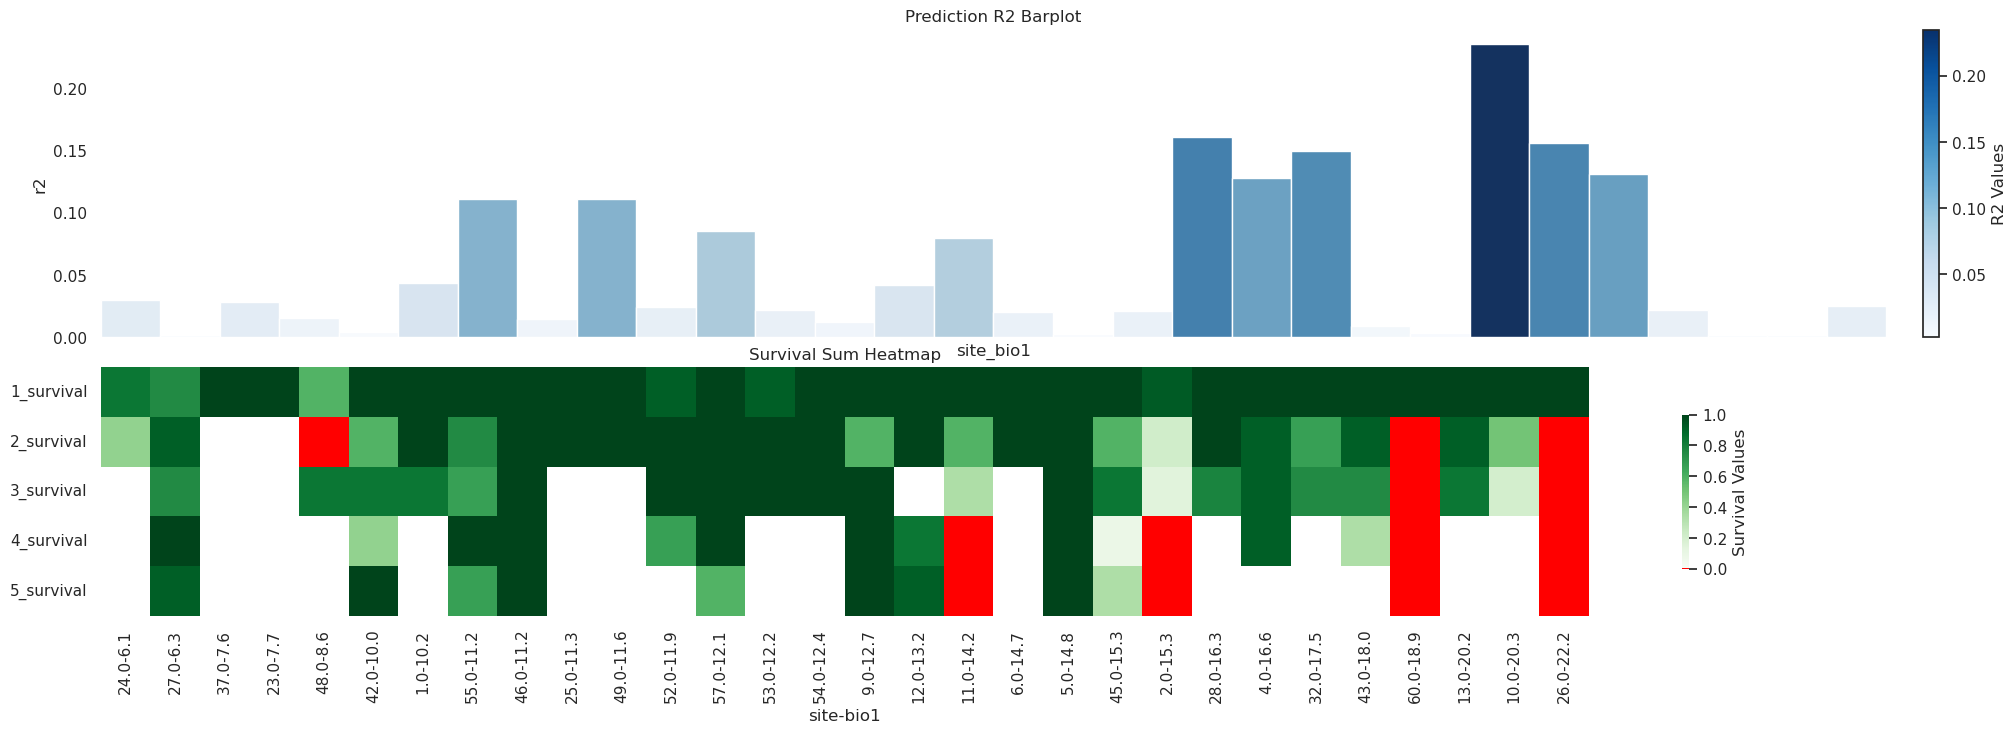

In [341]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

import pandas as pd
import numpy as np
import matplotlib.cm as cm
# Normalize the r2 values for color mapping
norm = plt.Normalize(pred['r2'].min(), pred['r2'].max())
cmap = plt.cm.Blues  # Choose a colormap

# Reset the index to use it as a column in the barplot
pred_reset = pred.reset_index()
pred_reset['site_bio1'] = pred_reset['site'].astype(str) + '_' + pred_reset['bio1'].astype(str)

# Create a figure with two subplots stacked vertically
fig, axes = plt.subplots(2, 1, figsize=(24, 8), gridspec_kw={'hspace': 0})

# Top bar plot with color based on value
bar_colors = cmap(norm(pred_reset['r2'].values))
bars = sns.barplot(data=pred_reset, x='site_bio1', y='r2', palette=bar_colors, ax=axes[0],width=1,)
axes[0].set_title("Prediction R2 Barplot")
axes[0].tick_params(left=False, bottom=False, labelbottom=False)

# Remove the top, bottom, left, and right spines (frame)
for spine in ["top", "right", "left", "bottom"]:
    axes[0].spines[spine].set_visible(False)

# Adding the color bar for the bar plot
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=axes[0], orientation='vertical', fraction=0.02, pad=0.02)
cbar.set_label('R2 Values')

# Get the original "Greens" colormap
greens = cm.get_cmap("Greens", 256)

# Replace the first color (corresponding to zero) with red
new_colors = greens(np.linspace(0, 1, 256))
new_colors[0] = [1, 0, 0, 1]  # Red color in RGBA
custom_greens = LinearSegmentedColormap.from_list("CustomGreens", new_colors)
sns.heatmap(survival_sum.T, ax=axes[1], square=True, cmap=custom_greens, 
            cbar_kws={'label': 'Survival Values', 'shrink': 0.5}, vmin=0, vmax=1)

axes[1].set_title("Survival Sum Heatmap")

# Reduce vertical space between the plots
plt.subplots_adjust(hspace=0)
plt.savefig('survival_pred.pdf')

# Display the combined plot
plt.show()


In [ ]:
sns.heatmap(pred.T, ax=axes[0], square=True, cmap="Blues", 
            cbar_kws={'label': 'Pred Values', 'shrink': 0.5})

In [323]:
surv = survival_sum.reset_index()

In [324]:
df = surv.merge(pred.reset_index())

In [326]:
df.rename(columns={col: f'X{col}' if col[0].isdigit() else col for col in df.columns}, inplace=True)

In [219]:
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Assuming df is your DataFrame and 'response' is your continuous variable

# Additive model: Y ~ r2 + bio1
additive_model = smf.ols('X5_survival ~ r2 + bio1', data=df).fit()
print("Additive Model Summary:")
print(additive_model.summary())

Additive Model Summary:
                            OLS Regression Results                            
Dep. Variable:            X5_survival   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     4.836
Date:                Wed, 14 May 2025   Prob (F-statistic):             0.0375
Time:                        12:48:06   Log-Likelihood:                -1.8752
No. Observations:                  12   AIC:                             9.750
Df Residuals:                       9   BIC:                             11.21
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6543      0

/carnegie/hpcdata/software/conda/envs/python-3.11/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [24]:
pred_go.columns = ['site', 'plot', 'r2', 'bio1']

In [25]:
pred_go

,site,plot,r2,bio1
0,1,1,0.016167,10.2
1,1,2,0.046013,10.2
2,1,3,0.042842,10.2
3,1,4,0.017574,10.2
4,1,5,0.027311,10.2
...,...,...,...,...
320,60,8,0.028243,18.9
321,60,9,0.000031,18.9
322,60,10,0.001283,18.9
323,60,11,0.002262,18.9


In [39]:
pred_ss.dtypes

index      int64
site       int64
plot       int64
r2       float64
bio1     float64
dtype: object

In [40]:
survival_sum['plot'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 18,
       17])

In [41]:
survival_sum.dtypes

site          float64
plot            int64
1_survival    float64
2_survival    float64
3_survival    float64
4_survival    float64
5_survival    float64
bio1          float64
dtype: object

In [71]:
df = survival_sum.merge(pred_ss, on=['site', 'plot']).merge(go_site)

df.columns = ['site', 'plot', 'X1_survival', 'X2_survival', 'X3_survival', 'X4_survival', 'X5_survival', 'bio1_x', 'index', 'r2', 'bio1_y', 'go']

In [72]:
df

,site,plot,X1_survival,X2_survival,X3_survival,X4_survival,X5_survival,bio1_x,index,r2,bio1_y,go
0,1.0,1,1.0,1.0,1.0,NaN,NaN,10.2,0,0.034547,10.2,0.021093
1,1.0,2,1.0,1.0,0.0,NaN,NaN,10.2,1,0.227895,10.2,0.021093
2,1.0,3,1.0,1.0,0.0,NaN,NaN,10.2,2,0.087794,10.2,0.021093
3,1.0,4,1.0,1.0,1.0,NaN,NaN,10.2,3,0.082871,10.2,0.021093
4,1.0,5,1.0,1.0,1.0,NaN,NaN,10.2,4,0.138681,10.2,0.021093
...,...,...,...,...,...,...,...,...,...,...,...,...
320,60.0,8,1.0,0.0,0.0,0.0,0.0,18.9,320,0.045214,18.9,0.021407
321,60.0,9,1.0,0.0,0.0,0.0,0.0,18.9,321,0.016974,18.9,0.021407
322,60.0,10,1.0,0.0,0.0,0.0,0.0,18.9,322,0.001220,18.9,0.021407
323,60.0,11,1.0,0.0,0.0,0.0,0.0,18.9,323,0.086695,18.9,0.021407


/carnegie/hpcdata/software/conda/envs/python-3.11/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/carnegie/hpcdata/software/conda/envs/python-3.11/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/carnegie/hpcdata/software/conda/envs/python-3.11/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/carnegie/hpcdata/software/conda/envs/python-3.11/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: P

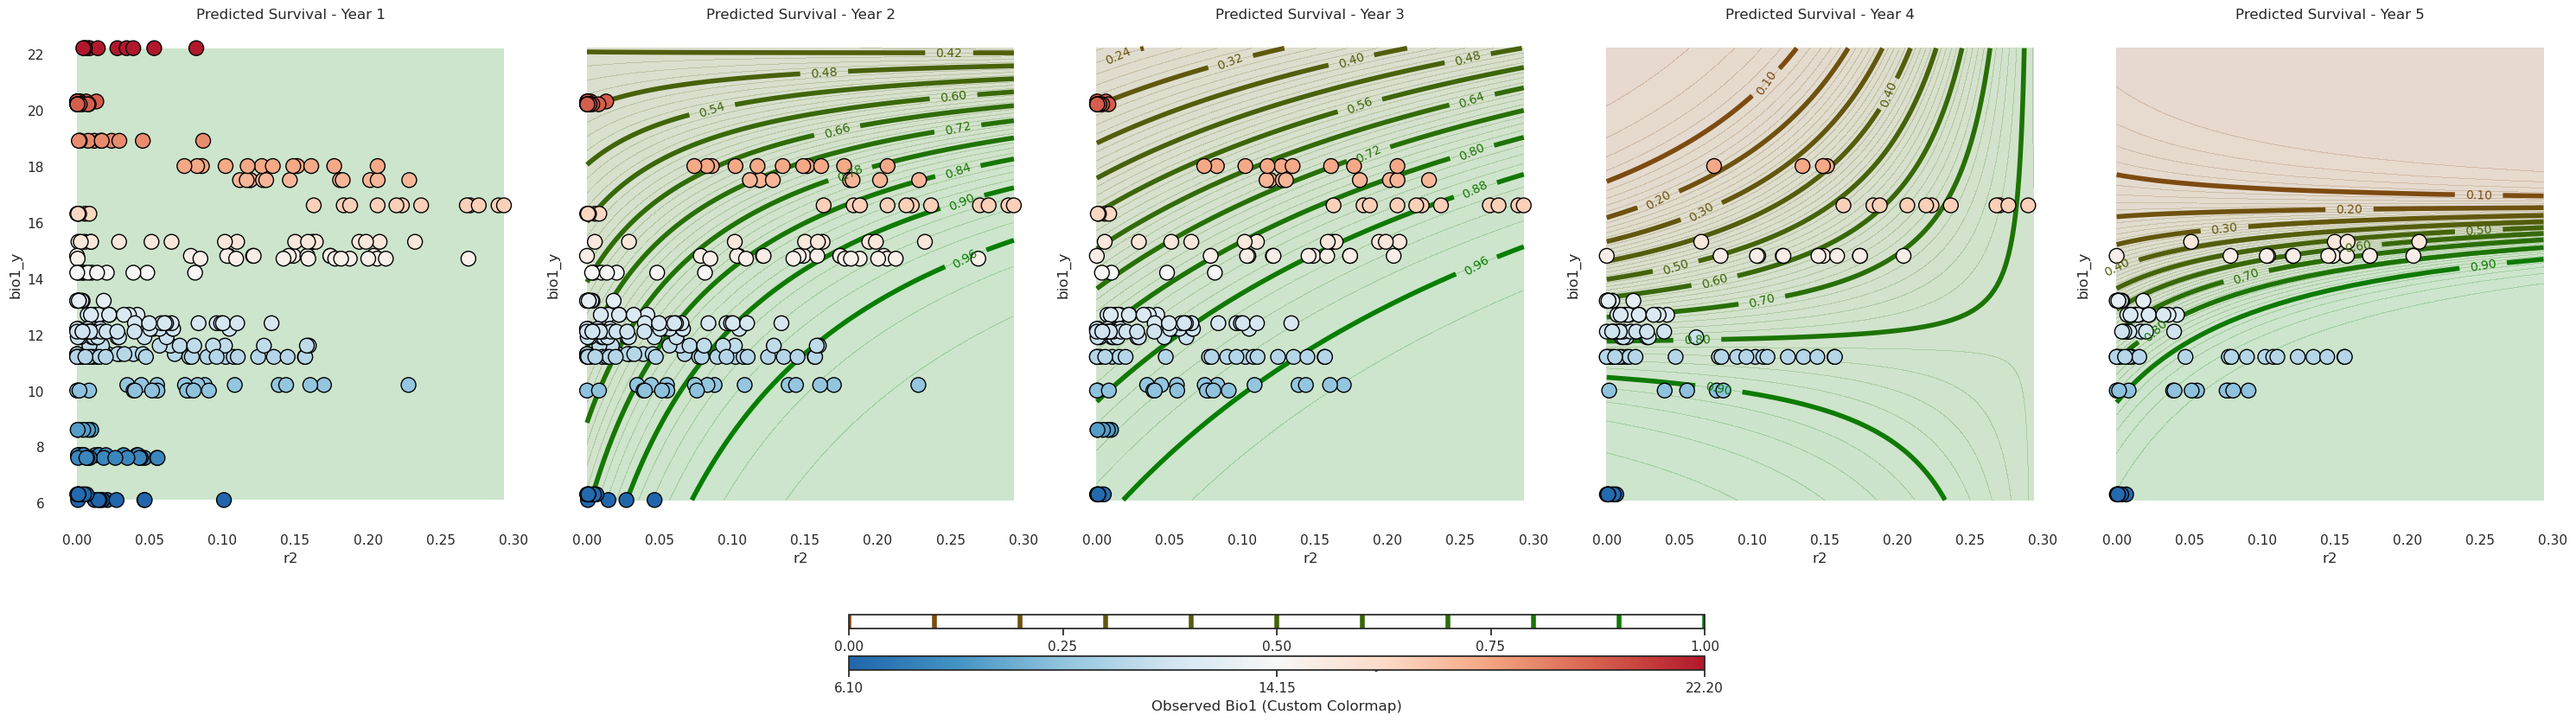

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from matplotlib.colors import LinearSegmentedColormap

# Custom colormap for contour lines (brown to green)
brown_green_cmap = LinearSegmentedColormap.from_list("BrownGreen", ["saddlebrown", "green"])

# Custom colormap for Bio1 based on your specified colors
# Custom colormap for Bio1 based on your specified colors
# Custom colormap for Bio1 (reversed: high values red, low values blue)
bio1_colors = ["#2166AC", "#4393C3", "#92C5DE", "#D1E5F0", "#F7F7F7", 
               "#FDDBC7", "#F4A582", "#D6604D", "#B2182B"]
bio1_cmap = LinearSegmentedColormap.from_list("Bio1Cmap", bio1_colors)

# List of survival columns to loop through
survival_columns = ['X1_survival', 'X2_survival', 'X3_survival', 'X4_survival', 'X5_survival']

# Create a 1x5 subplot grid
fig, axes = plt.subplots(1, 5, figsize=(30, 8), sharex=True, sharey=True)
sns.set(style="white")

# Margin factor for x and y limits
margin_factor = 0.05

# Set the shared survival range (0 to 1)
vmin, vmax = 0, 1

# Shared colormap range for scatter plots
scatter_vmin, scatter_vmax = df['bio1_y'].min(), df['bio1_y'].max()

# Iterate over each survival column and plot
for idx, survival_col in enumerate(survival_columns):
    # Fit the logistic regression model (GLM with binomial family)
    model = smf.glm(f'{survival_col} ~ r2 * bio1_y', data=df, family=sm.families.Binomial()).fit()

    # Create a grid of r2 and bio1_y values
    r2_vals = np.linspace(df['r2'].min(), df['r2'].max(), 100)
    go_vals = np.linspace(df['bio1_y'].min(), df['bio1_y'].max(), 100)
    r2_grid, go_grid = np.meshgrid(r2_vals, go_vals)

    # Create a DataFrame for predictions
    grid_df = pd.DataFrame({
        'r2': r2_grid.ravel(),
        'bio1_y': go_grid.ravel()
    })

    # Predict survival probabilities on the grid
    grid_df['predicted_survival'] = model.predict(grid_df)

    # Reshape predictions to match the grid shape
    predicted_survival = grid_df['predicted_survival'].values.reshape(r2_grid.shape)

    # Subplot position
    ax = axes[idx]
    ax.set_title(f"Predicted Survival - Year {idx + 1}")

    # Add the transparent colored background
    bg = ax.contourf(r2_grid, go_grid, predicted_survival, cmap=brown_green_cmap, 
                    levels=50, vmin=vmin, vmax=vmax, alpha=0.2)

    # Plot contour lines with thicker lines and custom colormap
    contour = ax.contour(r2_grid, go_grid, predicted_survival, cmap=brown_green_cmap, 
                         levels=10, vmin=vmin, vmax=vmax, linewidths=4)
    ax.clabel(contour, inline=True, fontsize=10, fmt="%.2f")
    ax.set_xlabel("r2")
    ax.set_ylabel("bio1_y")

    # Set plot limits with some margin
    x_margin = (df['r2'].max() - df['r2'].min()) * margin_factor
    y_margin = (df['bio1_y'].max() - df['bio1_y'].min()) * margin_factor
    ax.set_xlim(df['r2'].min() - x_margin, df['r2'].max() + x_margin)
    ax.set_ylim(df['bio1_y'].min() - y_margin, df['bio1_y'].max() + y_margin)

    # Filter the dataset for the current year (only survivors)
    this_year = df[['r2', 'bio1_y', survival_col]]
    this_year = this_year[this_year[survival_col] == 1]
    
    # Scatter plot with consistent color scale and black edges
    scatter = ax.scatter(this_year['r2'], this_year['bio1_y'], 
                         c=this_year['bio1_y'], cmap=bio1_cmap, 
                         s=150, edgecolor='black', linewidth=1, 
                         vmin=scatter_vmin, vmax=scatter_vmax, zorder=3)

    # Remove the top, bottom, left, and right spines (frame)
    for spine in ["top", "right", "left", "bottom"]:
        ax.spines[spine].set_visible(False)

# Add a single shared horizontal colorbar for predicted survival (contour lines)
cbar_pred_ax = fig.add_axes([0.33, 0.08, 0.33, 0.02])  # [left, bottom, width, height]
cbar_pred = fig.colorbar(contour, cax=cbar_pred_ax, orientation='horizontal', label="Predicted Survival Probability")
cbar_pred.set_ticks([0, 0.25, 0.5, 0.75, 1])

# Add a single shared horizontal colorbar for observed survival (scatter plot)
cbar_obs_ax = fig.add_axes([0.33, 0.02, 0.33, 0.02])  # Adjusted position and width for the second colorbar
cbar_obs = fig.colorbar(scatter, cax=cbar_obs_ax, orientation='horizontal', label="Observed Bio1 (Custom Colormap)")
cbar_obs.set_ticks([scatter_vmin, (scatter_vmin + scatter_vmax) / 2, scatter_vmax])

# Adjust layout and save
plt.tight_layout(rect=[0, 0.15, 1, 1])  # Adjust to make space for the colorbars
#plt.savefig('survival_pred_sites_ss_bio1.pdf')
plt.show()


In [257]:
go_site

,site,go
0,1,0.021093
1,2,0.021248
2,4,0.021281
3,5,0.021213
4,6,0.021214
5,9,0.021158
6,10,0.021523
7,11,0.021200
8,12,0.021164
9,13,0.021477


In [108]:
df = survival_sum.merge(pred_go, on=['site', 'plot']).merge(go_site)

In [109]:
df.columns = ['site', 'plot', 'X1_survival', 'X2_survival', 'X3_survival', 'X4_survival', 'X5_survival', 'bio1_x', 'r2', 'bio1_y', 'go']

In [110]:
len(df)

325

/carnegie/hpcdata/software/conda/envs/python-3.11/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/carnegie/hpcdata/software/conda/envs/python-3.11/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/carnegie/hpcdata/software/conda/envs/python-3.11/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/carnegie/hpcdata/software/conda/envs/python-3.11/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: P

NameError: name 'scatter' is not defined

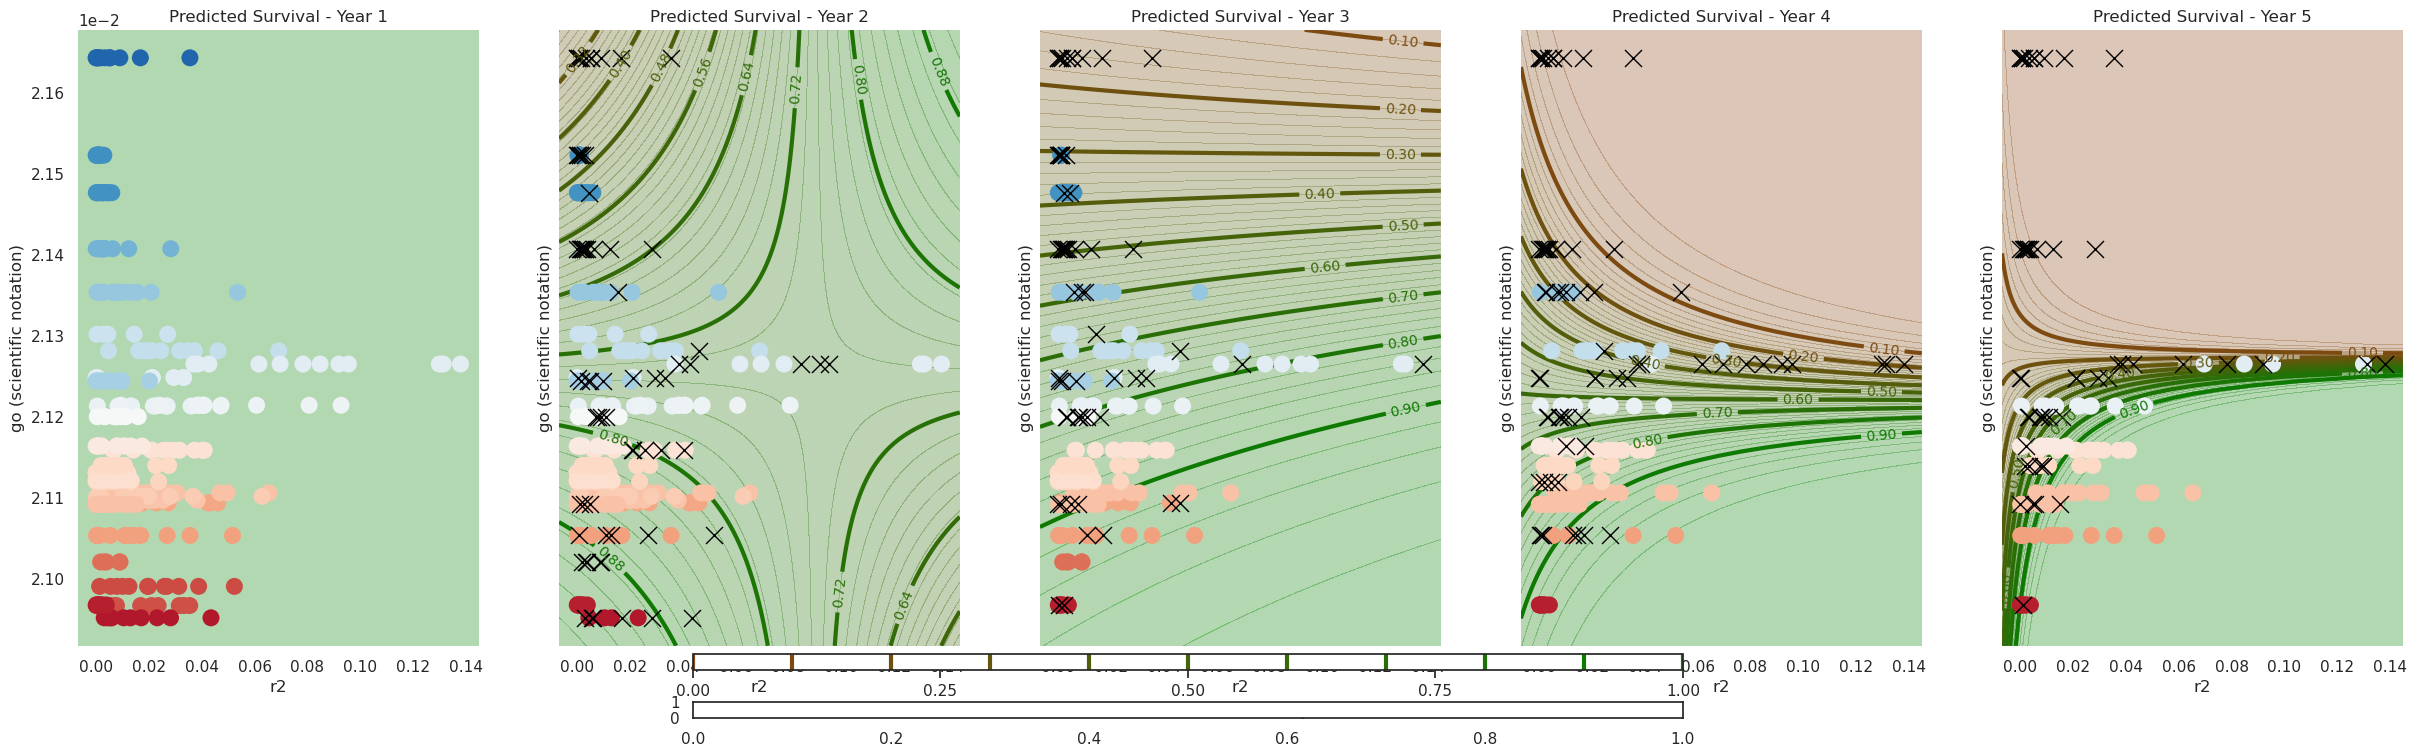

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from matplotlib.colors import LinearSegmentedColormap

# Custom colormap for contour lines (brown to green)
brown_green_cmap = LinearSegmentedColormap.from_list("BrownGreen", ["saddlebrown", "green"])

# Custom colormap for Bio1 based on your specified colors
bio1_colors = ["#B2182B", "#D6604D", "#F4A582", "#FDDBC7", "#F7F7F7", 
               "#D1E5F0", "#92C5DE", "#4393C3", "#2166AC"]
bio1_cmap = LinearSegmentedColormap.from_list("Bio1Cmap", bio1_colors)

# List of survival columns to loop through
survival_columns = ['X1_survival', 'X2_survival', 'X3_survival', 'X4_survival', 'X5_survival']

# Create a 1x5 subplot grid
fig, axes = plt.subplots(1, 5, figsize=(30, 8), sharex=True, sharey=True)
sns.set(style="white")

# Margin factor for x and y limits
margin_factor = 0.05

# Set the shared survival range (0 to 1)
vmin, vmax = 0, 1

# Shared colormap range for scatter plots
scatter_vmin, scatter_vmax = df['bio1_y'].min(), df['bio1_y'].max()

# Iterate over each survival column and plot
for idx, survival_col in enumerate(survival_columns):
    # Fit the logistic regression model (GLM with binomial family)
    model = smf.glm(f'{survival_col} ~ r2 * go', data=df, family=sm.families.Binomial()).fit()

    # Create a grid of r2 and go values
    r2_vals = np.linspace(df['r2'].min(), df['r2'].max(), 100)
    go_vals = np.linspace(df['go'].min(), df['go'].max(), 100)
    r2_grid, go_grid = np.meshgrid(r2_vals, go_vals)

    # Create an extended grid of r2 and go values to cover more area
    r2_min, r2_max = df['r2'].min(), df['r2'].max()
    go_min, go_max = df['go'].min(), df['go'].max()

    # Expand the range of r2 and go by adding 20% on both sides
    expanded = 0.05
    r2_expanded = np.linspace(r2_min - expanded * (r2_max - r2_min), r2_max + expanded * (r2_max - r2_min), 150)
    go_expanded = np.linspace(go_min - expanded * (go_max - go_min), go_max + expanded * (go_max - go_min), 150)

    # Create the expanded meshgrid
    r2_grid, go_grid = np.meshgrid(r2_expanded, go_expanded)

    # Create a DataFrame for predictions
    grid_df = pd.DataFrame({
        'r2': r2_grid.ravel(),
        'go': go_grid.ravel()
    })

    # Predict survival probabilities on the grid
    grid_df['predicted_survival'] = model.predict(grid_df)

    # Reshape predictions to match the expanded grid shape
    predicted_survival = grid_df['predicted_survival'].values.reshape(r2_grid.shape)

    # Subplot position
    ax = axes[idx]
    ax.set_title(f"Predicted Survival - Year {idx + 1}")

    # Add the transparent colored background, covering more area
    bg = ax.contourf(r2_grid, go_grid, predicted_survival, cmap=brown_green_cmap, 
                    levels=50, vmin=vmin, vmax=vmax, alpha=0.3)

    # Plot contour lines with thicker lines and custom colormap
    contour = ax.contour(r2_grid, go_grid, predicted_survival, cmap=brown_green_cmap, 
                         levels=10, vmin=vmin, vmax=vmax, linewidths=3)
    ax.clabel(contour, inline=True, fontsize=10, fmt="%.2f")
    ax.set_xlabel("r2")
    ax.set_ylabel("go (scientific notation)")
    
    # Format the 'go' axis in scientific notation
    ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

    # Set the limits explicitly to include all points and extended background
    ax.set_xlim(r2_min - expanded * (r2_max - r2_min), r2_max +expanded * (r2_max - r2_min))
    ax.set_ylim(go_min -expanded  * (go_max - go_min), go_max +expanded * (go_max - go_min))

    # Filter the dataset for the current year
    this_year = df[['r2', 'go', survival_col, 'bio1_y']]

    # Separate alive (1) and dead (0) points
    alive_points = this_year[this_year[survival_col] == 1]
    dead_points = this_year[this_year[survival_col] == 0]

    # Plot alive points as circles with black edges
    scatter_alive = ax.scatter(alive_points['r2'], alive_points['go'], 
                               c=alive_points['bio1_y'], cmap=bio1_cmap, 
                               s=150, edgecolor='black', linewidth=0, 
                               vmin=scatter_vmin, vmax=scatter_vmax, zorder=3)

    # Plot dead points as crosses
    scatter_dead = ax.scatter(dead_points['r2'], dead_points['go'], 
                              s=150, color='black', linewidth=1, marker='x', 
                              zorder=3)

    # Remove the top, bottom, left, and right spines (frame)
    for spine in ["top", "right", "left", "bottom"]:
        ax.spines[spine].set_visible(False)



# Add a single shared horizontal colorbar for predicted survival (contour lines)
cbar_pred_ax = fig.add_axes([0.33, 0.08, 0.33, 0.02])  # [left, bottom, width, height]
cbar_pred = fig.colorbar(contour, cax=cbar_pred_ax, orientation='horizontal', label="Predicted Survival Probability")
cbar_pred.set_ticks([0, 0.25, 0.5, 0.75, 1])

# Add a single shared horizontal colorbar for observed survival (scatter plot)
cbar_obs_ax = fig.add_axes([0.33, 0.02, 0.33, 0.02])  # Adjusted position and width for the second colorbar
cbar_obs = fig.colorbar(scatter, cax=cbar_obs_ax, orientation='horizontal', label="Observed Bio1 (Custom Colormap)")
cbar_obs.set_ticks([scatter_vmin, (scatter_vmin + scatter_vmax) / 2, scatter_vmax])

# Adjust layout and save
plt.tight_layout(rect=[0, 0.15, 1, 1])  # Adjust to make space for the colorbars
#plt.savefig('survival_pred_sites_custom_cmap.png')
plt.show()


/carnegie/hpcdata/software/conda/envs/python-3.11/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/carnegie/hpcdata/software/conda/envs/python-3.11/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/carnegie/hpcdata/software/conda/envs/python-3.11/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/carnegie/hpcdata/software/conda/envs/python-3.11/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: P

NameError: name 'scatter' is not defined

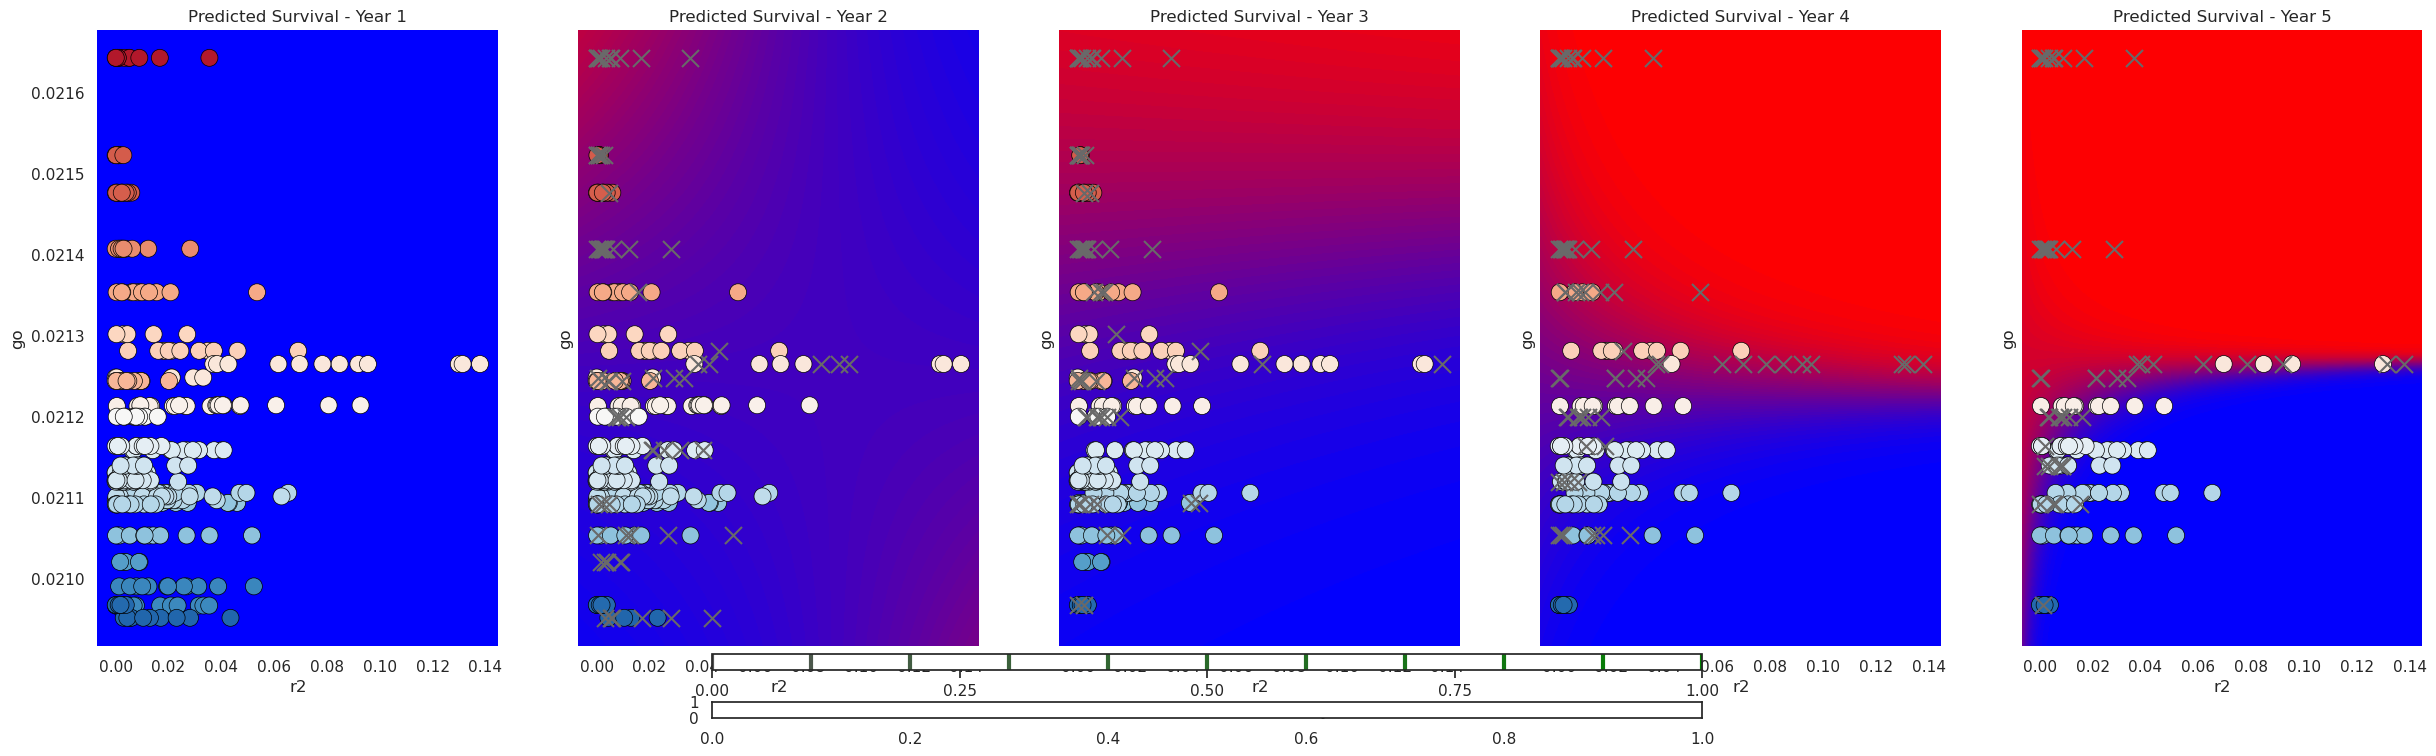

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from matplotlib.colors import LinearSegmentedColormap

# Custom colormap for contour lines (Dark Gray to Green)
brown_green_cmap = LinearSegmentedColormap.from_list("GreyGreen", ["#545454", "green"])
brown_green_cmap = LinearSegmentedColormap.from_list("GreyGreen", ["red", "blue"])

# Custom colormap for Bio1 (reversed: high values red, low values blue)
bio1_colors = ["#2166AC", "#4393C3", "#92C5DE", "#D1E5F0", "#F7F7F7", 
               "#FDDBC7", "#F4A582", "#D6604D", "#B2182B"]
bio1_cmap = LinearSegmentedColormap.from_list("Bio1Cmap", bio1_colors)

# List of survival columns to loop through
survival_columns = ['X1_survival', 'X2_survival', 'X3_survival', 'X4_survival', 'X5_survival']

# Create a 1x5 subplot grid
fig, axes = plt.subplots(1, 5, figsize=(30, 8), sharex=True, sharey=True)
sns.set(style="white")

# Margin factor for x and y limits
margin_factor = 0.05

# Set the shared survival range (0 to 1)
vmin, vmax = 0, 1

# Shared colormap range for scatter plots
scatter_vmin, scatter_vmax = df['bio1_y'].min(), df['bio1_y'].max()

# Iterate over each survival column and plot
for idx, survival_col in enumerate(survival_columns):
    # Fit the logistic regression model (GLM with binomial family)
    model = smf.glm(f'{survival_col} ~ r2 * go', data=df, family=sm.families.Binomial()).fit()

    # Create an extended grid of r2 and go values to cover more area
    r2_min, r2_max = df['r2'].min(), df['r2'].max()
    go_min, go_max = df['go'].min(), df['go'].max()

    # Expand the range of r2 and go by adding 5% on both sides
    expanded = 0.05
    r2_expanded = np.linspace(r2_min - expanded * (r2_max - r2_min), r2_max + expanded * (r2_max - r2_min), 150)
    go_expanded = np.linspace(go_min - expanded * (go_max - go_min), go_max + expanded * (go_max - go_min), 150)

    # Create the expanded meshgrid
    r2_grid, go_grid = np.meshgrid(r2_expanded, go_expanded)

    # Create a DataFrame for predictions
    grid_df = pd.DataFrame({
        'r2': r2_grid.ravel(),
        'go': go_grid.ravel()
    })

    # Predict survival probabilities on the grid
    grid_df['predicted_survival'] = model.predict(grid_df)

    # Reshape predictions to match the expanded grid shape
    predicted_survival = grid_df['predicted_survival'].values.reshape(r2_grid.shape)

    # Subplot position
    ax = axes[idx]
    ax.set_title(f"Predicted Survival - Year {idx + 1}")

    # Add the transparent colored background, covering more area
    bg = ax.contourf(r2_grid, go_grid, predicted_survival, cmap=brown_green_cmap, 
                    levels=50, vmin=vmin, vmax=vmax, alpha=1)

    # Plot contour lines with thicker lines and custom colormap
    #contour = ax.contour(r2_grid, go_grid, predicted_survival, cmap=brown_green_cmap, 
    #                     levels=10, vmin=vmin, vmax=vmax, linewidths=3)
    #ax.clabel(contour, inline=True, fontsize=10, fmt="%.2f")
    ax.set_xlabel("r2")
    ax.set_ylabel("go")

    # Set the limits explicitly to include all points and extended background
    ax.set_xlim(r2_min - expanded * (r2_max - r2_min), r2_max + expanded * (r2_max - r2_min))
    ax.set_ylim(go_min - expanded * (go_max - go_min), go_max + expanded * (go_max - go_min))

    # Filter the dataset for the current year
    this_year = df[['r2', 'go', survival_col, 'bio1_y']]

    # Separate alive (1) and dead (0) points
    alive_points = this_year[this_year[survival_col] == 1]
    dead_points = this_year[this_year[survival_col] == 0]

    # Plot alive points as circles with black edges and reversed Bio1 colormap
    scatter_alive = ax.scatter(alive_points['r2'], alive_points['go'], 
                               c=alive_points['bio1_y'], cmap=bio1_cmap, 
                               s=150, edgecolor='black', linewidth=0.5, 
                               vmin=scatter_vmin, vmax=scatter_vmax, zorder=3)

    # Plot dead points as crosses with a better shade of gray
    scatter_dead = ax.scatter(dead_points['r2'], dead_points['go'], 
                              s=150, color='dimgray', linewidth=1.5, marker='x', 
                              zorder=3)

    # Remove the top, bottom, left, and right spines (frame)
    for spine in ["top", "right", "left", "bottom"]:
        ax.spines[spine].set_visible(False)

# Add a single shared horizontal colorbar for predicted survival (contour lines)
cbar_pred_ax = fig.add_axes([0.33, 0.08, 0.33, 0.02])
cbar_pred = fig.colorbar(contour, cax=cbar_pred_ax, orientation='horizontal', label="Predicted Survival Probability")
cbar_pred.set_ticks([0, 0.25, 0.5, 0.75, 1])

# Add a single shared horizontal colorbar for observed survival (scatter plot)
cbar_obs_ax = fig.add_axes([0.33, 0.02, 0.33, 0.02])
cbar_obs = fig.colorbar(scatter, cax=cbar_obs_ax, orientation='horizontal', label="Observed Bio1 (Custom Colormap)")
cbar_obs.set_ticks([scatter_vmin, (scatter_vmin + scatter_vmax) / 2, scatter_vmax])

# Adjust layout and save
plt.tight_layout(rect=[0, 0.15, 1, 1])
#plt.savefig('survival_pred_sites_custom_greygreen.png')
plt.show()


In [85]:
df = survival_sum.merge(pred_ss, on=['site', 'plot']).merge(go_site)

df.columns = ['site', 'plot', 'X1_survival', 'X2_survival', 'X3_survival', 'X4_survival', 'X5_survival', 'bio1_x', 'index', 'r2', 'bio1_y', 'go']

In [86]:
import matplotlib

In [87]:
matplotlib.rcParams['pdf.fonttype'] = 42 

/carnegie/hpcdata/software/conda/envs/python-3.11/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/carnegie/hpcdata/software/conda/envs/python-3.11/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/carnegie/hpcdata/software/conda/envs/python-3.11/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/carnegie/hpcdata/software/conda/envs/python-3.11/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: P

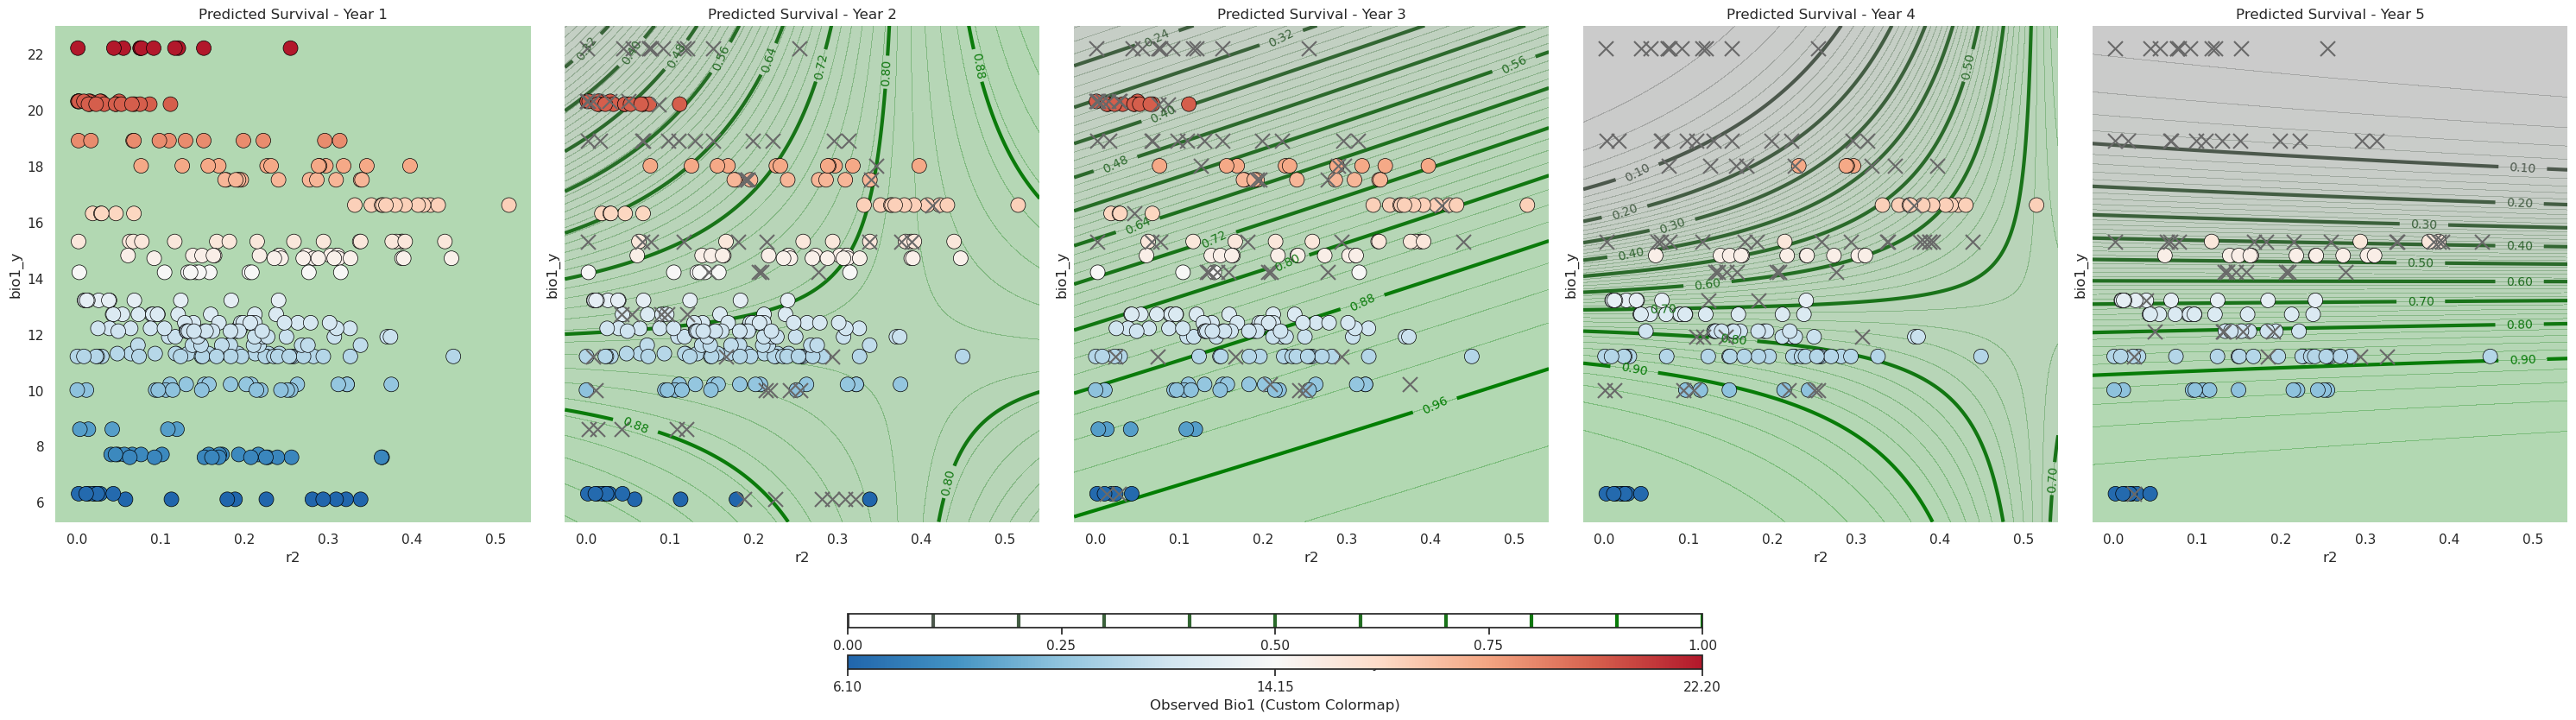

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from matplotlib.colors import LinearSegmentedColormap

# Custom colormap for contour lines (Dark Gray to Green)
brown_green_cmap = LinearSegmentedColormap.from_list("GreyGreen", ["#545454", "green"])

# Custom colormap for Bio1 (reversed: high values red, low values blue)
bio1_colors = ["#2166AC", "#4393C3", "#92C5DE", "#D1E5F0", "#F7F7F7", 
               "#FDDBC7", "#F4A582", "#D6604D", "#B2182B"]
bio1_cmap = LinearSegmentedColormap.from_list("Bio1Cmap", bio1_colors)

# List of survival columns to loop through
survival_columns = ['X1_survival', 'X2_survival', 'X3_survival', 'X4_survival', 'X5_survival']

# Create a 1x5 subplot grid
fig, axes = plt.subplots(1, 5, figsize=(30, 8), sharex=True, sharey=True)
sns.set(style="white")

# Margin factor for x and y limits
margin_factor = 0.05

# Set the shared survival range (0 to 1)
vmin, vmax = 0, 1

# Shared colormap range for scatter plots
scatter_vmin, scatter_vmax = df['bio1_y'].min(), df['bio1_y'].max()

# Iterate over each survival column and plot
for idx, survival_col in enumerate(survival_columns):
    # Fit the logistic regression model (GLM with binomial family)
    model = smf.glm(f'{survival_col} ~ r2 * bio1_y', data=df, family=sm.families.Binomial()).fit()

    # Create an extended grid of r2 and go values to cover more area
    r2_min, r2_max = df['r2'].min(), df['r2'].max()
    go_min, go_max = df['bio1_y'].min(), df['bio1_y'].max()

    # Expand the range of r2 and go by adding 5% on both sides
    expanded = 0.05
    r2_expanded = np.linspace(r2_min - expanded * (r2_max - r2_min), r2_max + expanded * (r2_max - r2_min), 150)
    go_expanded = np.linspace(go_min - expanded * (go_max - go_min), go_max + expanded * (go_max - go_min), 150)

    # Create the expanded meshgrid
    r2_grid, go_grid = np.meshgrid(r2_expanded, go_expanded)

    # Create a DataFrame for predictions
    grid_df = pd.DataFrame({
        'r2': r2_grid.ravel(),
        'bio1_y': go_grid.ravel()
    })

    # Predict survival probabilities on the grid
    grid_df['predicted_survival'] = model.predict(grid_df)

    # Reshape predictions to match the expanded grid shape
    predicted_survival = grid_df['predicted_survival'].values.reshape(r2_grid.shape)

    # Subplot position
    ax = axes[idx]
    ax.set_title(f"Predicted Survival - Year {idx + 1}")

    # Add the transparent colored background, covering more area
    bg = ax.contourf(r2_grid, go_grid, predicted_survival, cmap=brown_green_cmap, 
                    levels=50, vmin=vmin, vmax=vmax, alpha=0.3)

    # Plot contour lines with thicker lines and custom colormap
    contour = ax.contour(r2_grid, go_grid, predicted_survival, cmap=brown_green_cmap, 
                         levels=10, vmin=vmin, vmax=vmax, linewidths=3)
    ax.clabel(contour, inline=True, fontsize=10, fmt="%.2f")
    ax.set_xlabel("r2")
    ax.set_ylabel("bio1_y")

    # Set the limits explicitly to include all points and extended background
    ax.set_xlim(r2_min - expanded * (r2_max - r2_min), r2_max + expanded * (r2_max - r2_min))
    ax.set_ylim(go_min - expanded * (go_max - go_min), go_max + expanded * (go_max - go_min))

    # Filter the dataset for the current year
    this_year = df[['r2', 'bio1_y', survival_col]]

    # Separate alive (1) and dead (0) points
    alive_points = this_year[this_year[survival_col] == 1]
    dead_points = this_year[this_year[survival_col] == 0]

    # Plot alive points as circles with black edges and reversed Bio1 colormap
    scatter_alive = ax.scatter(alive_points['r2'], alive_points['bio1_y'], 
                               c=alive_points['bio1_y'], cmap=bio1_cmap, 
                               s=150, edgecolor='black', linewidth=0.5, 
                               vmin=scatter_vmin, vmax=scatter_vmax, zorder=3)

    # Plot dead points as crosses with a better shade of gray
    scatter_dead = ax.scatter(dead_points['r2'], dead_points['bio1_y'], 
                              s=150, color='dimgray', linewidth=1.5, marker='x', 
                              zorder=3)

    # Remove the top, bottom, left, and right spines (frame)
    for spine in ["top", "right", "left", "bottom"]:
        ax.spines[spine].set_visible(False)

# Add a single shared horizontal colorbar for predicted survival (contour lines)
cbar_pred_ax = fig.add_axes([0.33, 0.08, 0.33, 0.02])
cbar_pred = fig.colorbar(contour, cax=cbar_pred_ax, orientation='horizontal', label="Predicted Survival Probability")
cbar_pred.set_ticks([0, 0.25, 0.5, 0.75, 1])

# Add a single shared horizontal colorbar for observed survival (scatter plot)
cbar_obs_ax = fig.add_axes([0.33, 0.02, 0.33, 0.02])
cbar_obs = fig.colorbar(scatter_alive, cax=cbar_obs_ax, orientation='horizontal', label="Observed Bio1 (Custom Colormap)")
cbar_obs.set_ticks([scatter_vmin, (scatter_vmin + scatter_vmax) / 2, scatter_vmax])

# Adjust layout and save
plt.tight_layout(rect=[0, 0.15, 1, 1])
plt.savefig('survival_pred_sites_r2sslog_bio1.pdf')
plt.show()


In [225]:
this_year = df[['r2', 'go', 'X1_survival', 'bio1_y']]


In [229]:
this_year['X1_survival'].value_counts()

X1_survival
1.0    325
Name: count, dtype: int64

In [120]:
survival_columns = ['X1_survival', 'X2_survival', 'X3_survival', 'X4_survival', 'X5_survival']
for idx, survival_col in enumerate(survival_columns):
    # Fit the logistic regression model (GLM with binomial family)
    model = smf.glm(f'{survival_col} ~ r2 + go', data=df, family=sm.families.Binomial()).fit()
    #pseudo_r2 = 1 - (model.deviance / model.null_deviance)
    #print(f"Pseudo R-squared for {survival_col}: {pseudo_r2:.4f}")
    print(model.summary())

/carnegie/hpcdata/software/conda/envs/python-3.11/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/carnegie/hpcdata/software/conda/envs/python-3.11/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/carnegie/hpcdata/software/conda/envs/python-3.11/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/carnegie/hpcdata/software/conda/envs/python-3.11/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: P

                 Generalized Linear Model Regression Results                  
Dep. Variable:            X1_survival   No. Observations:                  325
Model:                            GLM   Df Residuals:                      322
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.5621e-09
Date:                Thu, 15 May 2025   Deviance:                   5.1253e-09
Time:                        13:19:53   Pearson chi2:                 2.56e-09
No. Iterations:                    24   Pseudo R-squ. (CS):         -1.577e-11
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.5661   1.55e+06   1.65e-05      1.0

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from matplotlib.colors import LinearSegmentedColormap

In [153]:
from sklearn.metrics import roc_auc_score

# List of survival columns to loop through
survival_columns = ['X1_survival', 'X2_survival', 'X3_survival', 'X4_survival', 'X5_survival']

# Loop through each survival column
for idx, survival_col in enumerate(survival_columns):
    # Fit the logistic regression model (GLM with binomial family)
    model = smf.glm(f'{survival_col} ~ r2 * go', data=df, family=sm.families.Binomial()).fit()
    print(f"Model Summary for {survival_col}:")
    print(model.summary())
    
    # Drop rows with NaN values in the survival column
    df_clean = df[[survival_col, 'r2', 'go']].dropna()

    # Check if the cleaned survival column has both classes (0 and 1)
    unique_classes = df_clean[survival_col].unique()
    if len(unique_classes) < 2:
        print(f"Cannot calculate AUC for {survival_col}: Only one class present ({unique_classes[0]}) or all values are NaN.")
        continue

    # Get the predicted probabilities for the cleaned data
    pred_probs = model.predict(df_clean)

    # Calculate AUC
    try:
        auc = roc_auc_score(df_clean[survival_col], pred_probs)
        print(f"AUC for {survival_col}: {auc:.4f}\n")
    except ValueError as e:
        print(f"Error calculating AUC for {survival_col}: {e}\n")


Model Summary for X1_survival:
                 Generalized Linear Model Regression Results                  
Dep. Variable:            X1_survival   No. Observations:                  325
Model:                            GLM   Df Residuals:                      321
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.5621e-09
Date:                Thu, 15 May 2025   Deviance:                   5.1253e-09
Time:                        16:15:11   Pearson chi2:                 2.56e-09
No. Iterations:                    24   Pseudo R-squ. (CS):         -1.577e-11
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.5661

/carnegie/hpcdata/software/conda/envs/python-3.11/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/carnegie/hpcdata/software/conda/envs/python-3.11/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/carnegie/hpcdata/software/conda/envs/python-3.11/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/carnegie/hpcdata/software/conda/envs/python-3.11/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: P

In [144]:
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import ScalarFormatter


/carnegie/hpcdata/software/conda/envs/python-3.11/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/carnegie/hpcdata/software/conda/envs/python-3.11/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/carnegie/hpcdata/software/conda/envs/python-3.11/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/carnegie/hpcdata/software/conda/envs/python-3.11/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: P

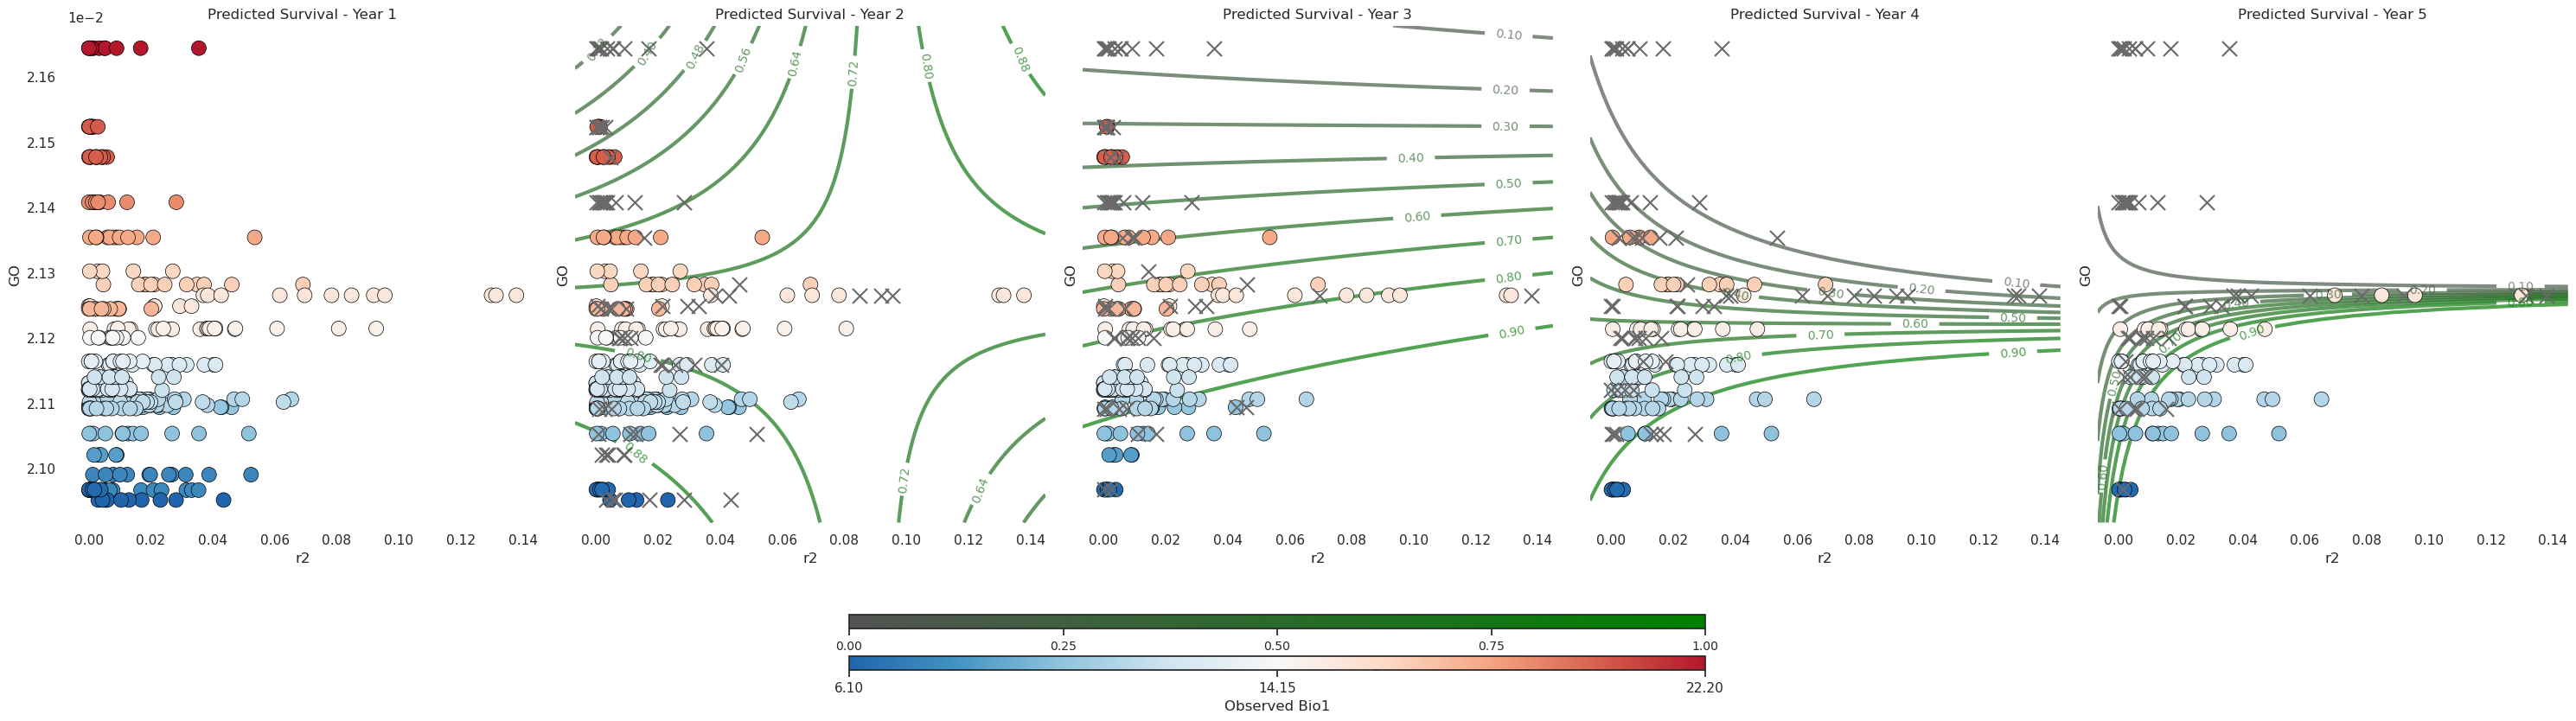

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from matplotlib.colors import LinearSegmentedColormap

# Custom colormap for contour lines (Dark Gray to Green)
brown_green_cmap = LinearSegmentedColormap.from_list("GreyGreen", ["#545454", "green"])

# Custom colormap for Bio1 (reversed: high values red, low values blue)
bio1_colors = ["#2166AC", "#4393C3", "#92C5DE", "#D1E5F0", "#F7F7F7", 
               "#FDDBC7", "#F4A582", "#D6604D", "#B2182B"]
bio1_cmap = LinearSegmentedColormap.from_list("Bio1Cmap", bio1_colors)

# List of survival columns to loop through
survival_columns = ['X1_survival', 'X2_survival', 'X3_survival', 'X4_survival', 'X5_survival']

# Create a 1x5 subplot grid
fig, axes = plt.subplots(1, 5, figsize=(30, 8), sharex=True, sharey=True)
sns.set(style="white")

# Margin factor for x and y limits
margin_factor = 0.05

# Set the shared survival range (0 to 1)
vmin, vmax = 0, 1

# Shared colormap range for scatter plots
scatter_vmin, scatter_vmax = df['bio1_y'].min(), df['bio1_y'].max()

# Iterate over each survival column and plot
for idx, survival_col in enumerate(survival_columns):
    # Fit the logistic regression model (GLM with binomial family)
    model = smf.glm(f'{survival_col} ~ r2 * go', data=df, family=sm.families.Binomial()).fit()

    # Create an extended grid of r2 and go values to cover more area
    r2_min, r2_max = df['r2'].min(), df['r2'].max()
    go_min, go_max = df['go'].min(), df['go'].max()

    # Expand the range of r2 and go by adding 5% on both sides
    expanded = 0.05
    r2_expanded = np.linspace(r2_min - expanded * (r2_max - r2_min), r2_max + expanded * (r2_max - r2_min), 150)
    go_expanded = np.linspace(go_min - expanded * (go_max - go_min), go_max + expanded * (go_max - go_min), 150)

    # Create the expanded meshgrid
    r2_grid, go_grid = np.meshgrid(r2_expanded, go_expanded)

    # Create a DataFrame for predictions
    grid_df = pd.DataFrame({
        'r2': r2_grid.ravel(),
        'go': go_grid.ravel()
    })

    # Predict survival probabilities on the grid
    grid_df['predicted_survival'] = model.predict(grid_df)

    # Reshape predictions to match the expanded grid shape
    predicted_survival = grid_df['predicted_survival'].values.reshape(r2_grid.shape)

    # Subplot position
    ax = axes[idx]
    ax.set_title(f"Predicted Survival - Year {idx + 1}")

    # Add the transparent colored background, covering more area
    #bg = ax.contourf(r2_grid, go_grid, predicted_survival, cmap=brown_green_cmap, 
    #                levels=50, vmin=vmin, vmax=vmax, alpha=0.3)

    # Plot contour lines with thicker lines and custom colormap
    contour = ax.contour(r2_grid, go_grid, predicted_survival, cmap=brown_green_cmap, 
                         levels=10, vmin=vmin, vmax=vmax, linewidths=3, alpha =0.7)
    ax.clabel(contour, inline=True, fontsize=10, fmt="%.2f")
    ax.set_xlabel("r2")
    ax.set_ylabel("GO")
    
    # Format the 'go' axis in scientific notation
    ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

    # Set the limits explicitly to include all points and extended background
    ax.set_xlim(r2_min - expanded * (r2_max - r2_min), r2_max + expanded * (r2_max - r2_min))
    ax.set_ylim(go_min - expanded * (go_max - go_min), go_max + expanded * (go_max - go_min))

    # Filter the dataset for the current year
    this_year = df[['r2', 'go', survival_col, 'bio1_y']]

    # Separate alive (1) and dead (0) points
    alive_points = this_year[this_year[survival_col] == 1]
    dead_points = this_year[this_year[survival_col] == 0]

    # Plot alive points as circles with black edges and reversed Bio1 colormap
    scatter_alive = ax.scatter(alive_points['r2'], alive_points['go'], 
                               c=alive_points['bio1_y'], cmap=bio1_cmap, 
                               s=150, edgecolor='black', linewidth=0.5, 
                               vmin=scatter_vmin, vmax=scatter_vmax, zorder=3)

    # Plot dead points as crosses with a better shade of gray
    scatter_dead = ax.scatter(dead_points['r2'], dead_points['go'], 
                              s=150, color='dimgray', linewidth=1.5, marker='x', 
                              zorder=3)

    # Remove the top, bottom, left, and right spines (frame)
    for spine in ["top", "right", "left", "bottom"]:
        ax.spines[spine].set_visible(False)

# Add a single shared horizontal colorbar for predicted survival (contour lines)
cbar_pred_ax = fig.add_axes([0.33, 0.08, 0.33, 0.02])

# Create a ScalarMappable for the colorbar using the same colormap and normalization


norm = Normalize(vmin=vmin, vmax=vmax)
sm = ScalarMappable(cmap=brown_green_cmap, norm=norm)
sm.set_array([])  # Dummy data for colorbar

cbar_pred = fig.colorbar(sm, cax=cbar_pred_ax, orientation='horizontal', label="Predicted Survival Probability")
cbar_pred.set_ticks([0, 0.25, 0.5, 0.75, 1])
cbar_pred.ax.tick_params(labelsize=10)  # Adjust label size for readability

# Add a single shared horizontal colorbar for observed survival (scatter plot)
cbar_obs_ax = fig.add_axes([0.33, 0.02, 0.33, 0.02])
cbar_obs = fig.colorbar(scatter_alive, cax=cbar_obs_ax, orientation='horizontal', label="Observed Bio1")
cbar_obs.set_ticks([scatter_vmin, (scatter_vmin + scatter_vmax) / 2, scatter_vmax])

# Adjust layout and save
plt.tight_layout(rect=[0, 0.15, 1, 1])
plt.savefig('survival_pred_sites_go_r2go.png')
plt.savefig('survival_pred_sites_go_r2go.pdf')

plt.show()
